# Quick Start - Usage Guide - SOM Clustering Visualizations



### **For the concreate usage of the implemented methods check the python doc(strings).** !

### Visualization Types

- SOM Clustering
  - Clustering directly the SOM units
  - Additionally show data frequencies of the units
- SOM Data Clustering (Clustering the data and print it 
  - Clustering the data and show it on the SOM
  - Eighter visualize the **majority class** or use a **class distribution pie**
  
### Cluster Types
- KMeans Clustering
- Hierarchical Clustering in 3 modes
  - single
  - complete
  - average
  - ward
  
### Input Compatiblity

Support of:
 - SOM generated by MiniSOM
 - SOM generated by SOMToolbox

### 1. Step - Generate Data structures

The visulatisation utilize two datastructures: *SOMMap* and *UnitsMapWithLinkedVectors*.

*SOMMap* is just a class to represent a SOM. It can be generated from the SOMToolbox data or from Minsom data. It then provied a unified access to the visulization api independent of the data source.

The same applies to *UnitsMapWithLinkedVectors* which contains the information which input data is mapped to each SOM unit. This data structure is only necessary when one wants to show the data frequency indicators in the SOM Clustering and for every SOM data clustering method.

In [5]:
from som.som_data import UnitsMapWithLinkedVectors, SOMMap, read_somtoolbox_input_to_df
from sklearn.preprocessing import StandardScaler
import minisom as som

# Data Pre Processing Function
def prep_process(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)



# Create From SOMToolbox data

som_somtoolbox = SOMMap.from_somtoolbox(
    "../data/10Clusters/10clusters_trained.wgt")

som_units_somtoolbox = UnitsMapWithLinkedVectors.from_somtoolbox(
    "../data/10Clusters/10clusters_trained.unit",
    "../data/10Clusters/10clusters.vec")


# Create From Minisom data

tencluster_data = read_somtoolbox_input_to_df(
    "../data/10Clusters/10clusters.vec")
tencluster_data = prep_process(tencluster_data.to_numpy())
minisom = som.MiniSom(10, 10, tencluster_data.shape[1])
minisom.train_random(tencluster_data, 20000, verbose=True)


som_minisom = SOMMap.from_minisom(minisom)

som_units_minisom = UnitsMapWithLinkedVectors.from_minisom(minisom, tencluster_data)

 [ 20000 / 20000 ] 100% 0.00168 it/s

### 2. Step - Generate Cluster Visu

#### SOM Clustering

The SOM Clustering Visualization generates cluster of the som units.
There are two different variants: k-means and hierachical clustering. 
One can use the SOMMap datastructure to provide the necessary input parameters. In addition one has to set the number of clusters.

For hierachical clustering there are 4 different modes: single, complete, average, ward.
One can optinally set a preprocessing function. 

In [8]:
from som.som_cluster import generate_hierarchy_map, generate_kmeans_map


# Generate K-Means Map
kmeans_map = generate_kmeans_map(som_somtoolbox.map_weight_df,
                                 som_somtoolbox.x_dim, som_somtoolbox.y_dim,
                                 n_clusters=10, preprocess=prep_process)

# Generate Hierachical Map (mode complete)
hirachy_map = generate_hierarchy_map(som_somtoolbox.map_weight_df,
                                     som_somtoolbox.x_dim, som_somtoolbox.y_dim,
                                     n_clusters=10, linkage='complete',
                                     preprocess=prep_process)


#### SOM Data Clustering

The SOM Data Clustering clusters the data and assign the data elements to the SOM units.

Similar to SOM Clustering there is the possiblity to use k-means or one of 4 hierachical clustering techniques. The UnitsMapWithLinkedVectors datastructure provieds the necessary input parameter, only the number of cluster has to be set.

One can optinally set a preprocessing function.

In [11]:
from som.som_cluster import generate_data_kmeans_map, generate_data_hierarchy_map

# Generate K-Means Data Map
kmeans_data_map = generate_data_kmeans_map(som_units_somtoolbox.unit_map,
                                           som_units_somtoolbox.input_vec_df,
                                           n_clusters=10, preprocess=prep_process)

# Generate Hierachical Data Map
hirachy_data_map = generate_data_hierarchy_map(som_units_somtoolbox.unit_map,
                                               som_units_somtoolbox.input_vec_df,
                                               n_clusters=10, linkage='complete',
                                               preprocess=prep_process)


### 3. Step - Plot Cluster Visu

#### SOM Clustering

The SOM Clustering Plot plots the individual unit clusters with a separate color.
Optionally a custom list of colors (one for each cluster class) can be set.
To influence the size of the plot one can optionally set the size of one unit cell (default is 1.0)

**Option: Show Data distribution**:
Optionally one can visualize how much data is assigned to which unit. The size of the circle represents the amount of data assigned to the unit*). This is especially nice to compare it to a SOM Data clustering plot and check how clustering the SOM and the data directly diverge.

*) The ratio between the smallest and the biggest circle can be set via the optinal circle_size_ratio parameter

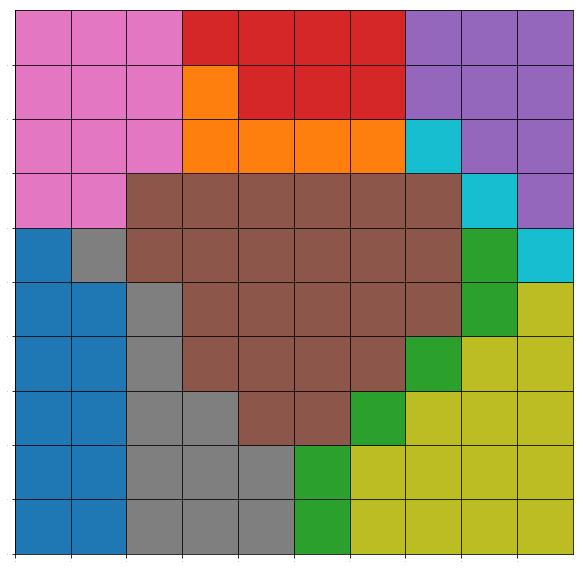

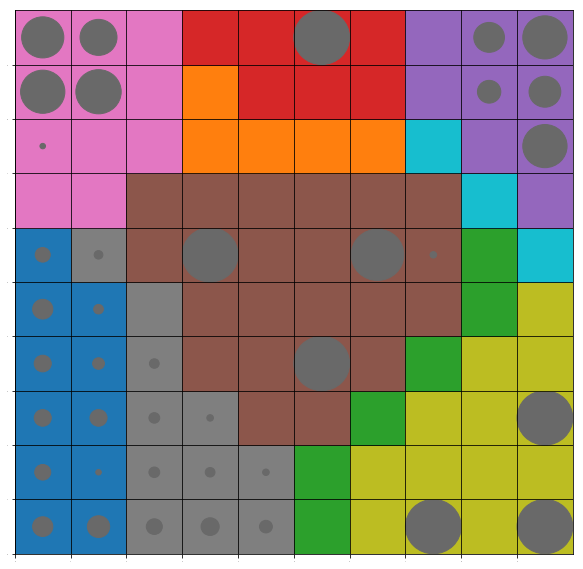

In [13]:
from som.som_cluster import plot_cluster_map

plot_cluster_map(kmeans_map)

# Show with units
plot_cluster_map(kmeans_map, unit_map=som_units_somtoolbox.unit_map)


#### SOM Data Clustering

Since in SOM Data Clustering we do not cluster the SOM but the data wie apply the color to the data points of a unit. There are two modes:

1. In the *major* mode each unit marker get the color of the majority cluster class of the assigned data.
2. In the *pie* mode each unit marker is a small piechart showing the cluster class distribution of the unit.

The size of the circle in the unit visualize again the amount of data assigned to the unit*).

*) The ratio between the smallest and the biggest circle can be set via the optinal circle_size_ratio parameter

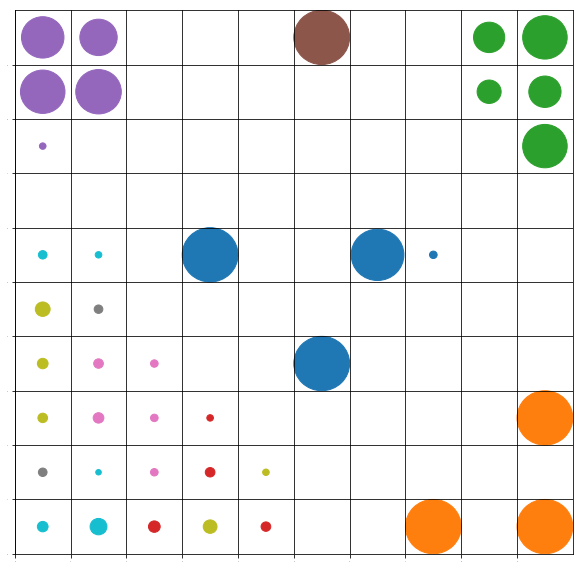

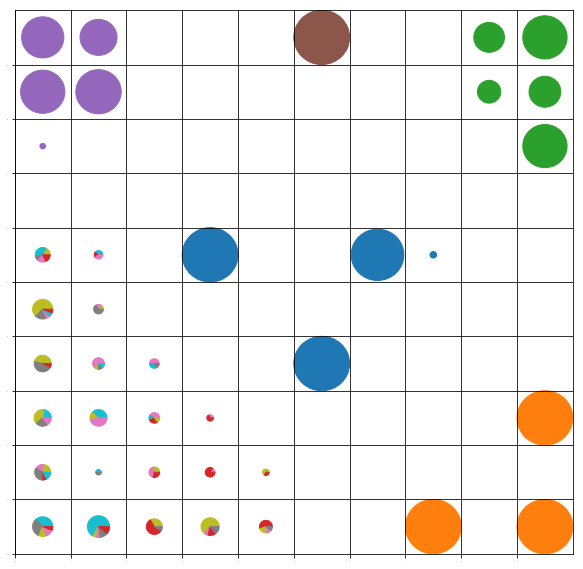

In [15]:
from som.som_cluster import plot_data_cluster_map

plot_data_cluster_map(kmeans_data_map, som_somtoolbox.x_dim, som_somtoolbox.y_dim,
                      mode='major')

plot_data_cluster_map(kmeans_data_map, som_somtoolbox.x_dim, som_somtoolbox.y_dim,
                      mode='pie')
